In [1]:
import torch
import numpy as np
import pandas as pd
from preprocess.PreProcess import ASAP_PreProcess, TA_PreProcess, GS_PreProcess
from models import E2E_CNN, E2E_LSTM
from trainer import End2end_trainer
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_name = 'GS' # or 'ASAP'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seed = 1
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
if data_name == 'ASAP':
    asap = ASAP_PreProcess(end2end=True)
    w2v_model, train_set, dev_set, test_set = asap.get_dataset()
elif data_name == 'TA':
    ta = TA_PreProcess(end2end=True)
    w2v_model, train_set, dev_set, test_set = ta.get_dataset()
elif data_name == 'GS':
    gs = GS_PreProcess(end2end=True)
    w2v_model, train_set, dev_set, test_set = gs.get_dataset()

N_vocab: 11359 | D_embed: 200 | N_aspects: 20


### Train

In [4]:
# model = E2E_CNN(w2v_model.E, data_name=data_name).to(device)
model = E2E_LSTM(w2v_model.E, data_name=data_name).to(device)
model

E2E_LSTM(
  (E): Embedding(11359, 200)
  (encoder): LSTM(200, 50, dropout=0.5, bidirectional=True)
  (fc1): Linear(in_features=200, out_features=4, bias=True)
  (fc2): Linear(in_features=200, out_features=4, bias=True)
  (fc3): Linear(in_features=200, out_features=4, bias=True)
  (fc4): Linear(in_features=200, out_features=4, bias=True)
  (fc5): Linear(in_features=200, out_features=4, bias=True)
  (fc6): Linear(in_features=200, out_features=4, bias=True)
  (fc7): Linear(in_features=200, out_features=4, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

### Train

In [5]:
epochs = 20
batch_size = 128
trainer = End2end_trainer(data_name=data_name)

TRAIN EPOCH: 1 | TRAIN-LOSS: 2.73839 | TRAIN-ACC: 0.82969: 100%|█████████████████████| 279/279 [00:08<00:00, 33.05it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 183.28it/s]


VAL-ACC: 0.83741


TRAIN EPOCH: 2 | TRAIN-LOSS: 2.87300 | TRAIN-ACC: 0.82031: 100%|█████████████████████| 279/279 [00:07<00:00, 38.16it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 173.93it/s]


VAL-ACC: 0.83888


TRAIN EPOCH: 3 | TRAIN-LOSS: 2.62361 | TRAIN-ACC: 0.83750: 100%|█████████████████████| 279/279 [00:07<00:00, 38.24it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 179.43it/s]


VAL-ACC: 0.83585


TRAIN EPOCH: 4 | TRAIN-LOSS: 2.49846 | TRAIN-ACC: 0.85625: 100%|█████████████████████| 279/279 [00:07<00:00, 38.17it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 178.49it/s]


VAL-ACC: 0.84320


TRAIN EPOCH: 5 | TRAIN-LOSS: 2.06785 | TRAIN-ACC: 0.86250: 100%|█████████████████████| 279/279 [00:07<00:00, 38.21it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 174.83it/s]


VAL-ACC: 0.84154


TRAIN EPOCH: 6 | TRAIN-LOSS: 2.44911 | TRAIN-ACC: 0.85000: 100%|█████████████████████| 279/279 [00:07<00:00, 38.03it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 132.65it/s]


VAL-ACC: 0.84449


TRAIN EPOCH: 7 | TRAIN-LOSS: 2.69620 | TRAIN-ACC: 0.83750: 100%|█████████████████████| 279/279 [00:07<00:00, 37.98it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 178.49it/s]


VAL-ACC: 0.84435


TRAIN EPOCH: 8 | TRAIN-LOSS: 2.28328 | TRAIN-ACC: 0.85313: 100%|█████████████████████| 279/279 [00:07<00:00, 38.17it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 181.33it/s]


VAL-ACC: 0.84439


TRAIN EPOCH: 9 | TRAIN-LOSS: 2.74381 | TRAIN-ACC: 0.83281: 100%|█████████████████████| 279/279 [00:07<00:00, 38.01it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 187.31it/s]


VAL-ACC: 0.84508


TRAIN EPOCH: 10 | TRAIN-LOSS: 2.78593 | TRAIN-ACC: 0.81563: 100%|████████████████████| 279/279 [00:07<00:00, 38.05it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 185.28it/s]


VAL-ACC: 0.84467


TRAIN EPOCH: 11 | TRAIN-LOSS: 2.13049 | TRAIN-ACC: 0.86094: 100%|████████████████████| 279/279 [00:07<00:00, 38.02it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 188.35it/s]


VAL-ACC: 0.84421


TRAIN EPOCH: 12 | TRAIN-LOSS: 2.69415 | TRAIN-ACC: 0.84844: 100%|████████████████████| 279/279 [00:07<00:00, 38.03it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 190.45it/s]


VAL-ACC: 0.84490


TRAIN EPOCH: 13 | TRAIN-LOSS: 2.11543 | TRAIN-ACC: 0.86250: 100%|████████████████████| 279/279 [00:07<00:00, 38.12it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 138.56it/s]


VAL-ACC: 0.84490


TRAIN EPOCH: 14 | TRAIN-LOSS: 2.28556 | TRAIN-ACC: 0.85781: 100%|████████████████████| 279/279 [00:07<00:00, 38.06it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 189.39it/s]


VAL-ACC: 0.84619


TRAIN EPOCH: 15 | TRAIN-LOSS: 2.83871 | TRAIN-ACC: 0.80469: 100%|████████████████████| 279/279 [00:07<00:00, 38.01it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 185.28it/s]


VAL-ACC: 0.84577


TRAIN EPOCH: 16 | TRAIN-LOSS: 2.32867 | TRAIN-ACC: 0.85156: 100%|████████████████████| 279/279 [00:07<00:00, 38.08it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 184.28it/s]


VAL-ACC: 0.84609


TRAIN EPOCH: 17 | TRAIN-LOSS: 2.68479 | TRAIN-ACC: 0.81875: 100%|████████████████████| 279/279 [00:07<00:00, 37.87it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 186.29it/s]


VAL-ACC: 0.84559


TRAIN EPOCH: 18 | TRAIN-LOSS: 2.45042 | TRAIN-ACC: 0.83750: 100%|████████████████████| 279/279 [00:07<00:00, 37.91it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 187.31it/s]


VAL-ACC: 0.84545


TRAIN EPOCH: 19 | TRAIN-LOSS: 1.83727 | TRAIN-ACC: 0.90000: 100%|████████████████████| 279/279 [00:07<00:00, 37.95it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 186.29it/s]


VAL-ACC: 0.84545


TRAIN EPOCH: 20 | TRAIN-LOSS: 2.21642 | TRAIN-ACC: 0.88125: 100%|████████████████████| 279/279 [00:07<00:00, 38.10it/s]
validating: 100%|█████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 188.35it/s]


VAL-ACC: 0.84513


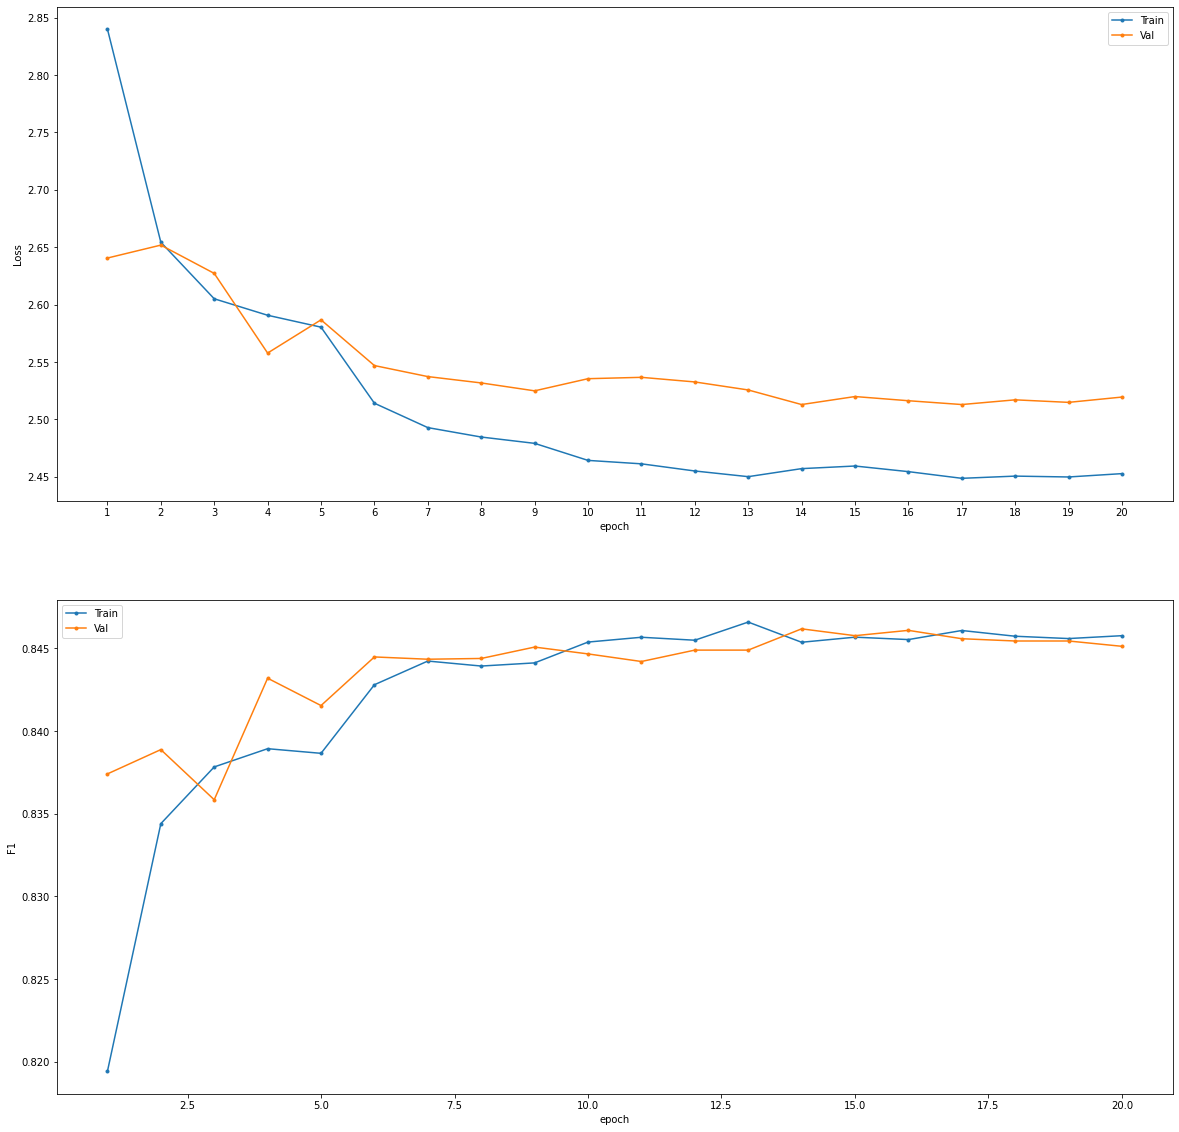

In [6]:
trainer.train(model, train_set, dev_set, device=device, epochs=epochs, batch_size=batch_size, 
              data_name=data_name, model_name='End2end_LSTM_' + str(seed))

Testing

In [7]:
model = E2E_LSTM(w2v_model.E, data_name=data_name).to(device)
# model = E2E_CNN(w2v_model.E, data_name=data_name).to(device)
model.load_state_dict(torch.load("./model_params/" + data_name + "_End2end_LSTM_"+ str(seed) +"_14.model"))
model.eval()

E2E_LSTM(
  (E): Embedding(11359, 200)
  (encoder): LSTM(200, 50, dropout=0.5, bidirectional=True)
  (fc1): Linear(in_features=200, out_features=4, bias=True)
  (fc2): Linear(in_features=200, out_features=4, bias=True)
  (fc3): Linear(in_features=200, out_features=4, bias=True)
  (fc4): Linear(in_features=200, out_features=4, bias=True)
  (fc5): Linear(in_features=200, out_features=4, bias=True)
  (fc6): Linear(in_features=200, out_features=4, bias=True)
  (fc7): Linear(in_features=200, out_features=4, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [8]:
trainer.test(model, test_set, batch_size, device)

testing: 100%|████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 180.37it/s]

ACSA: P: 0.83970 | R: 0.86675 | F1: 0.85301
SC: Accuracy: 0.8667457305502846
